## Downloading the JoJoGAN GitHub Repo to local machine

- Downloading GitHub Repo
- Ninja-linux package

In [1]:
# #@title Setup. This will take a few minutes.
!git clone https://github.com/mchong6/JoJoGAN.git
%cd JoJoGAN
!pip install tqdm gdown scikit-learn==0.22 scipy lpips dlib opencv-python
!wget https://github.com/ninja-build/ninja/releases/download/v1.8.2/ninja-linux.zip
!sudo unzip ninja-linux.zip -d /usr/local/bin/
!sudo update-alternatives --install /usr/bin/ninja ninja /usr/local/bin/ninja 1 --force

%load_ext autoreload
%autoreload 2"

Cloning into 'JoJoGAN'...
remote: Enumerating objects: 490, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 490 (delta 31), reused 31 (delta 31), pack-reused 450 (from 1)
Receiving objects: 100% (490/490), 63.51 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (203/203), done.
Updating files: 100% (110/110), done.
/content/JoJoGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: ERROR: Failed to build installable wheels for

# Installing gradio

In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing required Python Modules

In [5]:
import torch
from torchvision import transforms, utils
from PIL import Image
import math
import random
import os

import numpy as np
from torch import nn, autograd, optim
from torch.nn import functional as F
from copy import deepcopy

import imageio

torch.backends.cudnn.benchmark = True

## Importing JoJoGAN Specific Python Modules
- These modules are loaded from the JoJoGAN GitHub repo code (local file system)

In [6]:
# JoJoGAN Specific Import
from model import *
from e4e_projection import projection as e4e_projection
from util import *

/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


## Creating local folders for local content creation and management

In [7]:
os.makedirs('models', exist_ok=True)

In [8]:
%matplotlib inline

In [9]:
!ls -lah /content/JoJoGAN/models

total 8.0K
drwxr-xr-x  2 root root 4.0K Sep 10 17:35 .
drwxr-xr-x 11 root root 4.0K Sep 10 17:35 ..


In [10]:
!cp /content/drive/MyDrive/JoJoGAN/models/disney.pt /content/JoJoGAN/models/
!cp /content/drive/MyDrive/JoJoGAN/models/disney_preserve_color.pt /content/JoJoGAN/models/
!cp /content/drive/MyDrive/JoJoGAN/models/jojo.pt /content/JoJoGAN/models/
!cp /content/drive/MyDrive/JoJoGAN/models/jojo_preserve_color.pt /content/JoJoGAN/models/
!cp /content/drive/MyDrive/JoJoGAN/models/arcane_jinx.pt /content/JoJoGAN/models/
!cp /content/drive/MyDrive/JoJoGAN/models/arcane_jinx_preserve_color.pt /content/JoJoGAN/models/

In [19]:
!cp /content/drive/MyDrive/JoJoGAN/models/stylegan2-ffhq-config-f.pt /content/JoJoGAN/models/
!cp /content/drive/MyDrive/JoJoGAN/models/e4e_ffhq_encode.pt /content/JoJoGAN/models/

In [12]:
plt.rcParams['figure.dpi'] = 150
device = 'cuda' # 'cpu' | 'cuda' as GPU
latent_dim = 512

In [13]:
original_generator = Generator(1024, latent_dim, 8, 2).to(device)
ckpt = torch.load('models/stylegan2-ffhq-config-f.pt', map_location=lambda storage, loc: storage)
original_generator.load_state_dict(ckpt["g_ema"], strict=False)
mean_latent = original_generator.mean_latent(10000)

# to be finetuned generator
#generator = deepcopy(original_generator)

transform = transforms.Compose(
    [
        transforms.Resize((1024, 1024)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

<ipython-input-13-21195082bcee>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('models/stylegan2-ffhq-config-f.pt', map_location=lambda storage, loc: sto

In [15]:
def process_jojogan_model(source_image, pretrained):
  preserve_color = False

  aligned_face = align_face(source_image)
  name = strip_path_extension(source_image)+'.pt'

  my_w = e4e_projection(aligned_face, name, device).unsqueeze(0)

  ckpt = f'{pretrained}.pt'
  ckpt = torch.load(os.path.join('/content/JoJoGAN/models', ckpt), map_location=lambda storage, loc: storage)

  generator = deepcopy(original_generator)

  if pretrained in ['disney', 'jojo']:
    generator.load_state_dict(ckpt, strict=False)
  else:
    generator.load_state_dict(ckpt["g"], strict=False)

  with torch.no_grad():
      generator.eval()
      # original_my_sample = original_generator(my_w, input_is_latent=True)
      my_sample = generator(my_w, input_is_latent=True)

  face = transform(aligned_face).unsqueeze(0).to(device)

  return my_sample


In [21]:
pretrained = 'jojo'
applied_img = process_jojogan_model('/content/JoJoGAN/test_input/iu.jpeg', pretrained)

Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


<ipython-input-15-61684aa7b5cf>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join('/content/JoJoGAN/models', ckpt), map_location=lambda storag

In [22]:
type(applied_img)

torch.Tensor

### Please see at the bottom (of this notebook):
- To Upload your model (Checkpoint saved model) to /JoJoGAN/models folder
- To upload style_image_aligned files

In [23]:
npimage = applied_img[0].cpu().permute(1, 2, 0).detach().numpy()
# Scale the pixel values to 0-255 and convert to uint8
npimage = (npimage * 255).astype(np.uint8)
imageio.imwrite('result_img_final.jpeg', npimage)

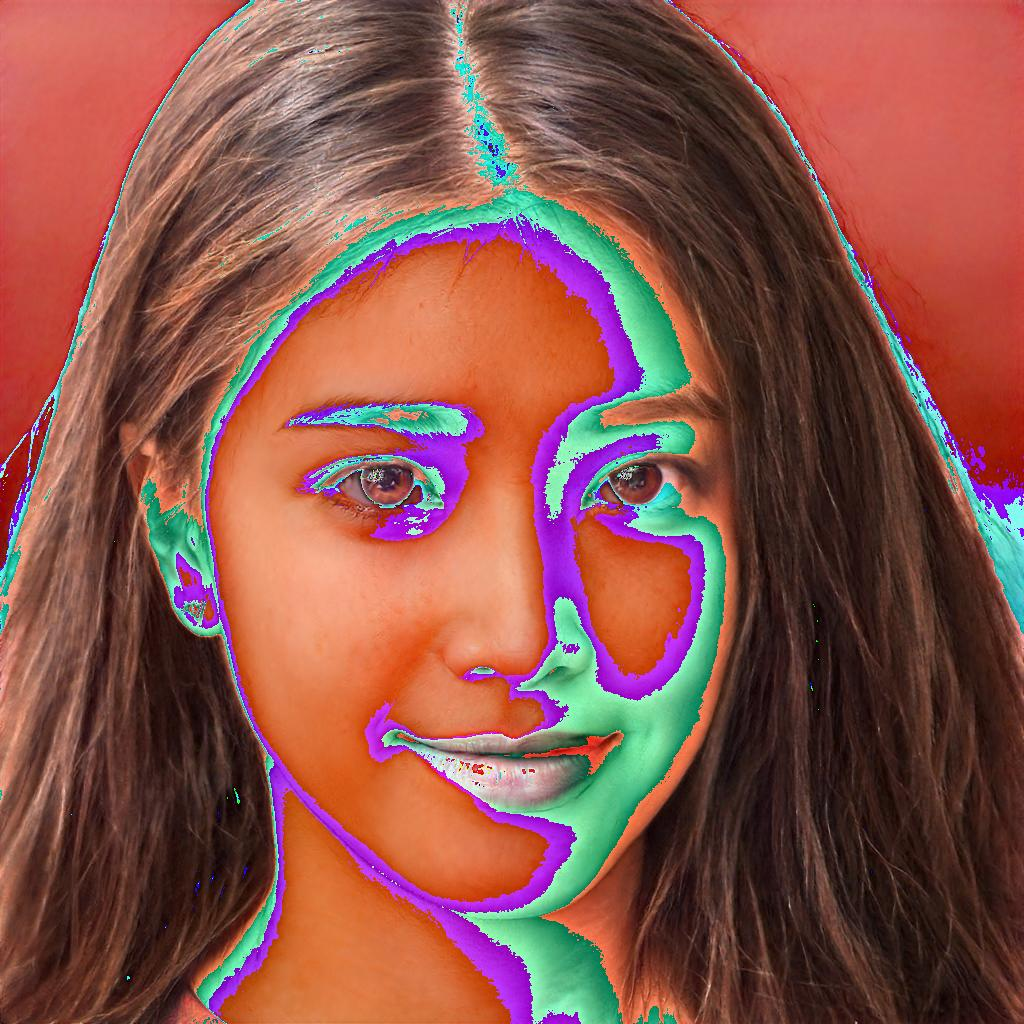

In [24]:
from IPython.display import Image
pil_img = Image(filename='result_img_final.jpeg')
display(pil_img)

# Gradio Front-end application

In [25]:
import gradio as gr

In [29]:
def jojogan_inference(image_in, model):
  image_in.save('temp_img.jpg')
  # lightyear-suite , disney, lightyear-face

  if model == 'Disney':
    model = 'disney'
  elif model == 'JoJo':
    model = 'jojo'
  elif model == 'Jinx':
    model = 'arcane_jinx'

  applied_img = process_jojogan_model('temp_img.jpg', model)

  npimage = applied_img[0].cpu().permute(1, 2, 0).detach().numpy()
  imageio.imwrite('out_result.jpeg', npimage)
  return 'out_result.jpeg'


In [30]:
title = "JoJoGAN"
description = "This demo uses 3 custom face styles"
demo = gr.Interface(jojogan_inference,
                    [gr.inputs.Image(type="pil"),
                     gr.inputs.Dropdown(choices=['Disney',
                                                 'JoJo',
                                                 'Jinx'],
                                        type="value", default='Disney', label="Model")],
                    gr.outputs.Image(type="file"),
                    title=title,
                    description=description,
                    article=article,
                    allow_flagging=False)

demo.launch()

AttributeError: module 'gradio' has no attribute 'inputs'

In [31]:
!pip install --upgrade gradio